<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220506_ml_08_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%91%9C%ED%98%84_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install mglearn

### 구글드라이브 연동

In [3]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt			        sample2.pdf
'2. 영화평점, 날짜별 영화평점 시각화'   sample.docx
 매수종목2.txt			        sample_merge.pdf
 atlas-higgs-challenge-2014-v2.csv.gz   sample.xlsx
 auto-mpg.csv			        score.csv
 bmi_500.csv			        seoul.html
 매수종목.csv			       'stock price (1).xlsx'
 data_studentlist_en.csv	       'stock price.xlsx'
'demo (1).docx'			        stock_px.csv
 demo.docx			       'stock valuation.xlsx'
 example.docx			        test.db.db
 heart_disease.csv		        test.txt
 height_weight.txt		        Titanic배포용
 hello_world.xlsx		        titanic_test.csv
 HelloWorld.xlsx		        titanic_train.csv
'little-char (1).png'		        titanic.xls
 little-char.png		        titanic.xlsx
 population_number.csv		        Traffic_Accident_2017.csv
 ram_price.csv			        train.csv
 ratings_small.txt		        user_id_mean.csv
'sample1 (1).pdf'		        wine.csv
 sample1.pdf			        주가데이터.xlsx
'sample (1).xlsx'		        남북한바

### 코렙에서 한글 사용

In [4]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


# 데이터 표현

- 연속형 특성(continuous feature) : 숫자로 이루어진 순서가 있는 데이터 특성

- 범주형 특성(categorical feature) 또는 이산형 특성(dicrete feature) : 숫자가 아닌 이산적인 데이터 특성
  (컴퓨터, 옷, 책 등)
  
- 데이터의 특성보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 큼

-  특성 공학(feature engineering) : 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것
  

## 레이블 인코딩(Label encoding)

- 카테고리 특성을 코드형 숫자 값으로 변환하는 것

| 상품구분 | 레이블 인코딩 |
|---|---|
|TV| 0|
|냉장고|1|
|전자렌지|2|
|컴퓨터|3|
|선풍기|4|
|믹서|5|

- 주의 : '01', '02' 코드값 역시 문자열이므로 1, 2와 같은 숫자형 값으로 변환

In [5]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서']

le = LabelEncoder()
le.fit(items)

le.transform(['TV','냉장고'])
print('레이블인코딩 변환값:', le.transform(items) )

print('레이블임코딩 클래스(범주):', le.classes_ )

le.inverse_transform([1,2,3,4,5])

레이블인코딩 변환값: [0 1 4 5 3 2]
레이블임코딩 클래스(범주): ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


array(['냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

- 몇몇 머신러닝 알고리즘에는 숫자 값을 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음
- 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문
- 원-핫-인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식

### 레이블 인코딩 실습 01

캐글 힉스 보존 대회
 - https://www.kaggle.com/c/higgs-boson

원본 데이터 CERN
- http://opendata.cern.ch/record/328

In [6]:
import pandas as pd

df = pd.read_csv(drive_path + 'atlas-higgs-challenge-2014-v2.csv.gz',
                 compression='gzip',
                 nrows=250000)
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [7]:
# 'Weight','KaggleSet' 삭제, 'Label'은 맨 뒤로 이동
#  'KaggleWeight' -> 'Weight' 이름 변경
df_new = df.drop(['Weight','KaggleSet','Label'], axis=1).assign(Label=df['Label'])
df_new.head(3)

df_new = df_new.rename(columns={"KaggleWeight": "Weight"})
df_new.head(3)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_new['Label'])

LabelEncoder()

In [10]:
le.classes_

array(['b', 's'], dtype=object)

In [11]:
df_new['Label'] = le.transform(df_new['Label'])

In [12]:
# XGBoost
X = df_new.iloc[:, 1:31]
y = df_new.iloc[:, -1]
X.shape, y.shape

((250000, 30), (250000,))

In [13]:
df_new['Label'].value_counts()

0    164333
1     85667
Name: Label, dtype: int64

In [14]:
df['test_Weight'] = df_new['Weight'] * 550000 / len(y)

missing : 누락된 값(결측치) 처리 <br>
scale_pos_weight : 스케일 인자


In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(missing=999.0)  #누락값처리

model.fit(X, y)

XGBClassifier(missing=999.0)

In [16]:
model.save_model('higgs_sklearn.model')

In [17]:
model_higgs = XGBClassifier()   # XGBoost 모델은 로드하기전 모델 초기화 필요
model_higgs.load_model('higgs_sklearn.model')
model_higgs.predict(X, output_margin=True)

array([-0.13355893, -0.7776285 , -2.1512163 , ..., -0.7979261 ,
       -0.28234234, -2.5235374 ], dtype=float32)

## 원-핫-인코딩(one-hot-encoding)

- 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법
- 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것

- 예를 들면 과목에 수학, 국어, 과학과 같이 3과목이 특성에 있다면 각각을 (1, 0, 0), (0, 1, 0) (0, 0, 1)과 같이 표현

- pandas나 scikit-learn을 이용하여 범주형 변수를 원-핫 인코딩으로 바꿀 수 있음

In [18]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환
le = LabelEncoder()
labels = le.fit_transform(items)
labels

# 2차원 데이터로 변화
labels = labels.reshape(-1, 1)

# 원-핫-인코딩 적용
ohe = OneHotEncoder()
labels_oh = ohe.fit_transform(labels)
labels_oh.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [19]:
# Pandas 원-핫-인코딩
# 숫자형 값으로 변환 없이도 바로 변환 가능
import pandas as pd
df = pd.DataFrame({'Item':items})
df

,Item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [20]:
pd.get_dummies(df)

,Item_TV,Item_냉장고,Item_믹서,Item_선풍기,Item_전자렌지,Item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 원-핫-인코딩 실습 01

- 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인 소득 데이터셋

- adult 데이터셋을 사용해 어떤 근로자의 수입이 50,000달라를 초과하는지, 그 이하일지를 예측

- 특성에는 나이, 고용형태, 교육 수준, 성별, 주당 근로시간, 직업 등이 있음

In [21]:
import os
import pandas as pd
import mglearn

# 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정 names 매개변수로 열 이름을 제공
names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'income']

# 실습을 위해 몇개의 열만 선택
select_names = ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']


df = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False, names= names)

df.head()

df = df[select_names]
df.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [23]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

#### 범주형 데이터 문자열 확인하기

In [24]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [25]:
# 열의 내용을 확인하기 위해 유일한 값이 각각 몇 번 나타나는지 출력
df['workclass'].value_counts()
df.loc[ df['workclass'] == ' ?' ]

,age,workclass,education,gender,hours-per-week,occupation,income
27,54,?,Some-college,Male,60,?,>50K
61,32,?,7th-8th,Male,40,?,<=50K
69,25,?,Some-college,Male,40,?,<=50K
77,67,?,10th,Male,2,?,<=50K
106,17,?,10th,Female,32,?,<=50K
...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Female,55,?,>50K
32531,30,?,Bachelors,Female,99,?,<=50K
32539,71,?,Doctorate,Male,10,?,>50K
32541,41,?,HS-grad,Female,32,?,<=50K


- 성별의 경우 Male, Female로 잘 나누어져있고, 정확하게 두 가지 값을 가지고 있어서 원-핫-인코딩으로 나타내기 좋은 형태
- 모든 열을 살펴보고 그 값들의 확인이 필요

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((32561, 6), (32561,))

In [27]:
X['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [33]:
# 원 핫 인코딩 수행
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#model = LogisticRegression().fit(X_train, y_train)
#model.score(X_test,y_test)

In [ ]:
# 원 핫 인코딩 수행
df_dummies = pd.get_dummies( df )
df_dummies.head().T

In [35]:
# 특성과 라벨을 분리
# income으로 시작하는 두 열에 인코딩된 라벨을 분리
X = df_dummies.iloc[:, :-2]
y = df_dummies.iloc[:, -1]
X.shape, y.shape

((32561, 44), (32561,))

In [36]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = LogisticRegression().fit(X_train, y_train)
model.score(X_test,y_test)

0.8067804937968308

- 훈련 데이터와 테스트 데이터를 모두 담고 있는 DataFrame을 사용해 원-핫-인코딩을 하는 이유
- 훈련 세트와 테스트 세트에 범주형 값이 같은 방식으로 표현되어야 하기 때문
- 각각 가지고 있는 범주형 값에 따라 특성의 개수가 달라지는 경우가 발생

#### 숫자로 표현된 범주형 특성

- 저장 공간을 위하여 범주형 변수가 숫자로 된 경우가 많음 (남자 : 1, 여자 : 0) -> 연속형으로 다뤄야 할지 범주형으로 다뤄야 할지 어려울 수 있음

- 영화 관람 등급의 경우에는 범주형이지만 순서를 가지고 있고, 영화 별점의 경우에는 별 개수에 따라 연속형으로 나타낼 수도 있고, 범주형으로 나타낼 수도 있음.

- 풀려는 문제나 데이터 그리고 어떤 머신러닝 알고리즘을 사용할지에 따라 선택

In [37]:
data = {'숫자특성':[0, 1, 2, 1], '범주형특성':['양말', '여우', '양말', '우산']} 
df = pd.DataFrame( data )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   숫자특성    4 non-null      int64 
 1   범주형특성   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [38]:
pd.get_dummies(df)

,숫자특성,범주형특성_양말,범주형특성_여우,범주형특성_우산
0,0,1,0,0
1,1,0,1,0
2,2,1,0,0
3,1,0,0,1


- get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않음

#### 숫자로 표현된 범주형 특성의 원핫 인코딩

- 숫자를 문자로 변환 한 후에 원핫 인코딩
```
demo_df['숫자'] = demo_df['숫자'].astype(str)
pd.get_dummies(demo_df, columns=['숫자'])
```

In [39]:
df['숫자특성'] = df['숫자특성'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   숫자특성    4 non-null      object
 1   범주형특성   4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [40]:
pd.get_dummies( df )

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_양말,범주형특성_여우,범주형특성_우산
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,0,0,1,1,0,0
3,0,1,0,0,0,1


## 피처 스케일링(feature scaling)

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 데이터의 스케일에 매우 민감한 머신러닝 알고리즘이 존재 (SVM, 신경망 등)

- 표준화(Standardization) : 데이터의 특성 각각이 평균은 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것

- 정규화(Normalization) : 서로 다른 특성의 크기를 통일하기 위해 크기를 변환해주는 것

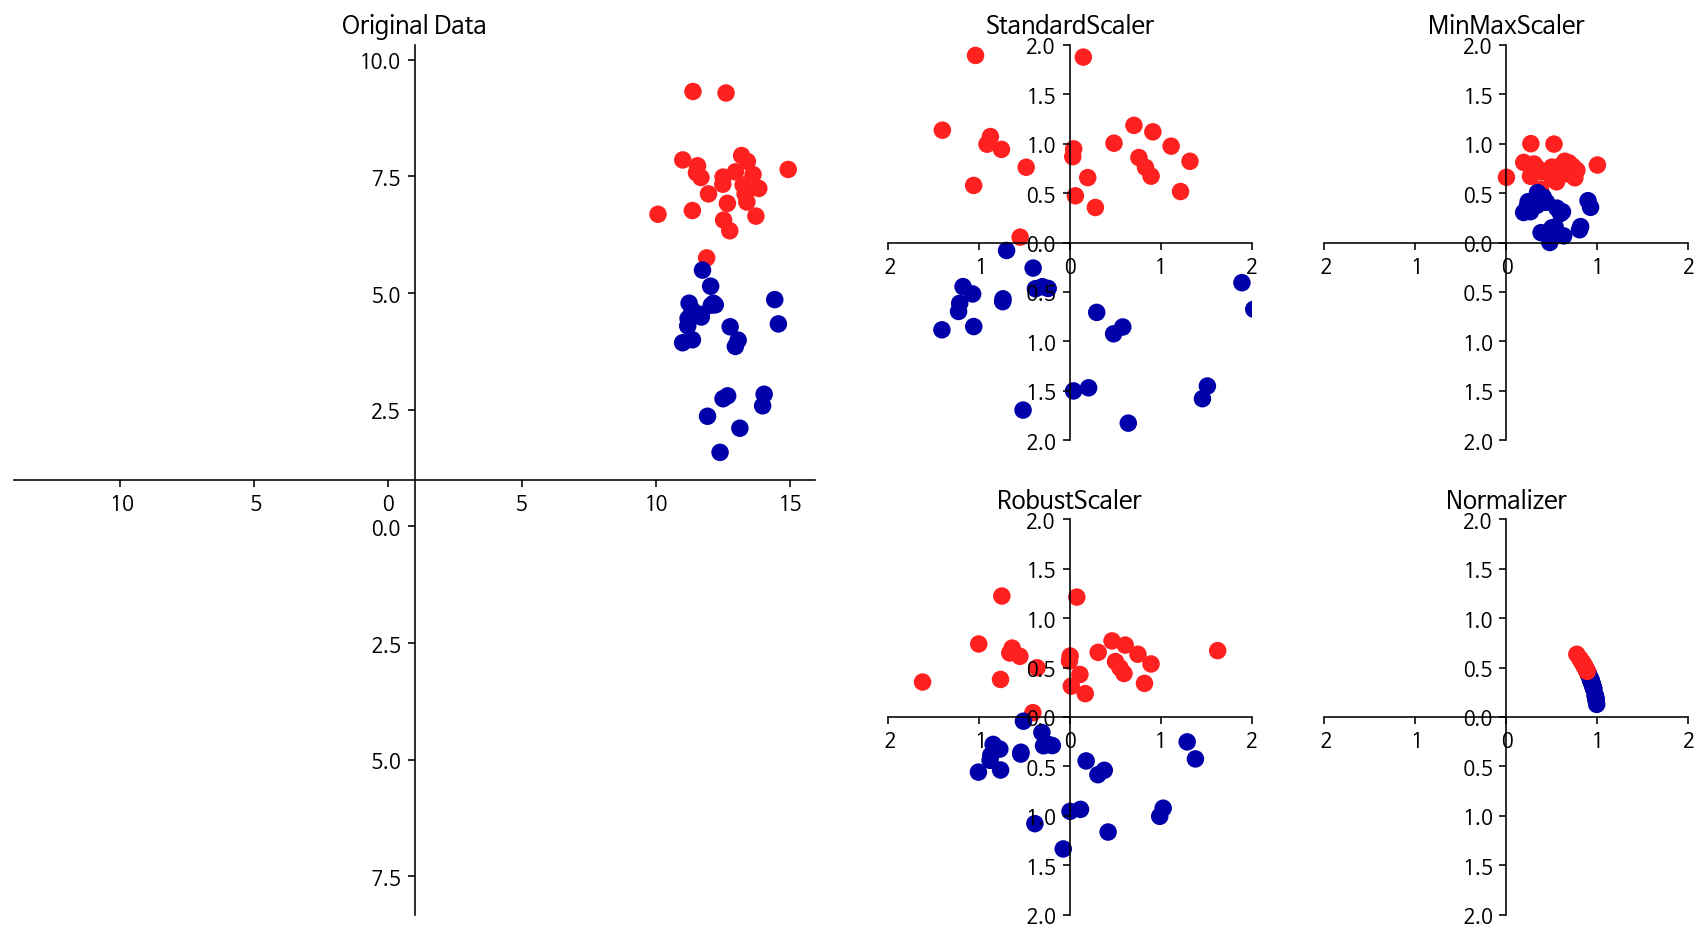

In [42]:
# 데이터셋의 스케일을 조정하거나 전처리하는 여러 방법
mglearn.plots.plot_scaling()

### StandardScaler

- 표준화를 쉽게 지원하기 위한 클래스
- 평균이 0이고, 분산이 1인 값으로 변환

- 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기에 표준화 적용이 필요

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [43]:
from sklearn.svm import SVC

model = SVC().fit(X_train, y_train)
model.score(X_test,y_test)

0.9370629370629371

In [44]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler

# 주의 : 변환을 위하 기준 정보 설정
# 학습 데이터와 테스트 데이터의 스케일링 기준 정보를 동일하게 유지

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
# 스케일 조정된 테스트 세트의 정확도
model = SVC(C=100).fit(X_train_scaled, y_train)
model.score(X_test_scaled , y_test)

0.958041958041958

In [45]:
import pandas as pd

df = pd.DataFrame(X_train_scaled)
print("특성들의 평균 값: \n", df.mean().max(), df.mean().min() )
print("특성들의 분산 값: \n", df.var().max(), df.var().min() )

특성들의 평균 값: 
 4.43864428779936e-15 -4.0890608583025134e-15
특성들의 분산 값: 
 1.0023529411764727 1.002352941176469


- 특성의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환

### MinMaxScaler

- 정규화를 쉽게 지원하기 위한 클래스
- 데이터값을 0과 1사이의 범위 값으로 변환


In [46]:
from sklearn.preprocessing import MinMaxScaler

# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
# 스케일 조정된 테스트 세트의 정확도
model = SVC(C=100).fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.965034965034965

In [47]:
# 특성들의 최소값
# 특성들의 최대값

df = pd.DataFrame(X_train_scaled)
print("특성들의 평균 값: \n", df.mean().max(), df.mean().min() )
print("특성들의 분산 값: \n", df.var().max(), df.var().min() )

특성들의 평균 값: 
 0.47502971560218216 0.06255967360706766
특성들의 분산 값: 
 0.051092898126947874 0.006306855435092131


# 특성 공학(feature engineering)

- 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것

특성 고려

- 범주형 특성 : 원-핫-인코딩
- 타임스탬프 : 새로운 시간 특성 추가
- 결측치(누락값) 처리 방법 : 평균, 중앙값, 이웃값, 예측값 등
- 앙상블 모델 : 상관관계가 적은 다양한 예측을 적용

- 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다름

 - 구간분할(bining) : 한 특성을 여러 특성으로 나누는 것 (이산화)
 ```
 from sklearn.preprocessing import KBinsDiscretizer
 ```

 - 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는데 도움이 됨

- 원본 데이터에 상호작용(interaction)과 다항식(polyonmial) 특성을 추가

## 특성 자동 선택

- 특성이 추가되면 모델이 복잡해지고 과대적합 가능성이 올라감

- 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음.

- 특성 선택 방법 : 일변량 통계, 모델 기반 선택, 반복적 선택


### 일변량 통계(univariate statistics)

- 특성과 타켓 사이에 중요한 통계적 관계가 있는지 계산하고 깊게 관련된 것만 선택

In [48]:
# 의미 없는 노이즈 특성을 추가하고, 식별해서 제거하는지 확인
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

# 고정된 난수를 발생
rnd = np.random.RandomState(42)
noise = rnd.normal( size = (len(cancer.data), 50))
noise.shape

# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈
X = np.hstack( [cancer.data, noise] )
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, 
                                                    test_size=0.5,
                                                    random_state=0)

X_train.shape, X_test.shape

# SelectPercentile을 사용하여 특성의 50%를 선택
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [49]:
X_train_select = select.transform(X_train)
X_train_select.shape

(284, 40)

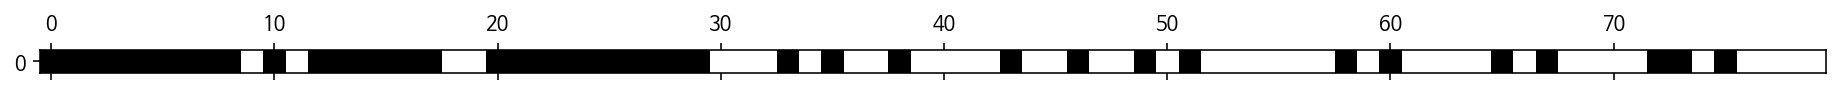

In [50]:
# 선택된 특성을 boolen 값으로 표시
# True는 검은색, False는 흰색으로 마스킹
mask = select.get_support()
plt.matshow( mask.reshape(1, -1), cmap = 'gray_r')
plt.yticks([0])
plt.show()

- 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거

전체 특성을 이용했을 때와 선택된 특성만 사용했을 때의 성능 비교

In [51]:
from sklearn.linear_model import LogisticRegression

# 전체 특성을 사용한 점수
# 선택된 일부 특성을 사용한 점수
model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
model.score(X_test, y_test)

0.9298245614035088

In [52]:
# 테스트 데이터 변환
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LogisticRegression(solver='liblinear').fit(X_train_selected, y_train)
model.score(X_test_selected, y_test)

0.9403508771929825

- 일부 원본 특성이 없더라도 노이즈 특성을 제거한 쪽의 성능이 더 높음
- 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 사용
- 많은 특성들이 확실히 도움이 안 된다고 생각될 때 사용

### 모델 기반 선택(model-based selection)

- 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 것만 선택

- 지도학습 모델은 최종적으로 사용할 학습 모델과 같을 필요는 없음

- 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서 매길 수 있어야 함

- 결정트리 기반의 모델들은 각 특성의 중요도를 feature_importances_에 저장

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# (지도 학습 모델로 계산된) 중요도가 지정한 임계치보다 큰 모든 특성 선택
# 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 
# 절반 가량의 특성이 선택될수 있도록 중간값을 임계치로 사용

select = SelectFromModel(RandomForestClassifier(random_state=0),
                         threshold= 'median')
select.fit(X_train, y_train)

select.transform(X_train).shape

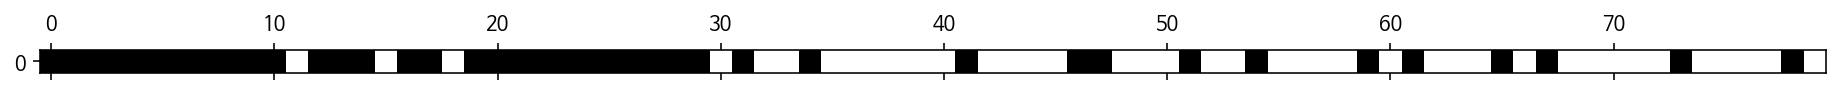

In [54]:
# 선택된 특성을 boolen 값으로 표시
# True는 검은색, False는 흰색으로 마스킹
mask = select.get_support()
plt.matshow( mask.reshape(1, -1), cmap = 'gray_r')
plt.yticks([0])
plt.show()

In [55]:
# 예측 성능 확인
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LogisticRegression(solver='liblinear').fit(X_train_selected, y_train)
model.score(X_test_selected, y_test)

0.9508771929824561

- 특성 선택이 더 잘 되었으므로 성능도 조금 향상

### 반복적 특성 선택(iterative selection)

- 특성의 수가 각기 다른 모델에서 만들어짐

- 방법

  1. 특성을 하나도 선택하지 않은 상태로 시작해 어떤 종료 조건을 도달할 때까지 하나씩 추가하는 방법
  2. 모든 특성을 가지고 시작해 어떤 종료 조건이 될 때까지 하나씩 제거하는 방법

In [56]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(random_state=0), n_features_to_select=40)
select.fit(X_train, y_train)

select.transform(X_train).shape

(284, 40)

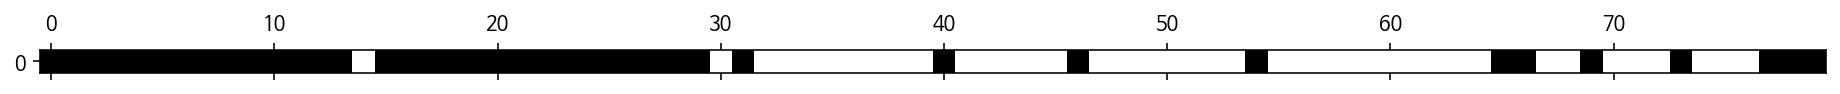

In [57]:
# 선택된 특성을 boolen 값으로 표시
# True는 검은색, False는 흰색으로 마스킹
mask = select.get_support()
plt.matshow( mask.reshape(1, -1), cmap='gray_r')
plt.yticks([0])
plt.show()

- 이전 보다 특성 선택이 나아졌지만, 여전히 특성 한 개를 놓침
- 랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행하여 모델 기반 선택보다 오래 걸림

In [58]:
# 예측 성능 확인
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

model = LogisticRegression(solver='liblinear').fit(X_train_selected, y_train)
model.score(X_test_selected, y_test)

0.9508771929824561

- 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만 함

## 전문가적(도메인) 지식 활용

- 특성 공학은 특정 어플리케이션을 위해 전문가적 지식을 사용할 수 있는 중요한 영역
- 분야 전문가는 종종 초기 데이터에서 더 유용한 특성을 선택할 수 있도록 도움을 줄 수 있음

- 해당 분야에 내재된 사전 지식이 특성으로 추가될 수 있다면 머신러닝 알고리즘에 도움이 됨

## 특성 공학 실습 01 

시티바이크 데이터

- http://www.citibikenyc.com/system-data

- 문제 : 특정 날짜와 시간에 앤디 집 앞에 있는 자전거를 사람들이 얼마나 대여할 것인지 예측하는 것 
- 앤디가 빌릴 자전거가 남아 있을까?

차트 한글

```
# Windows
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```
```
from matplotlib import rc
rc('font', family='Malgun Gothic')
```

In [59]:
# 2015년 8월 데이터 세 시간 간격 일일 주요 경향
import mglearn

citibike = mglearn.datasets.load_citibike()
type( citibike )
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

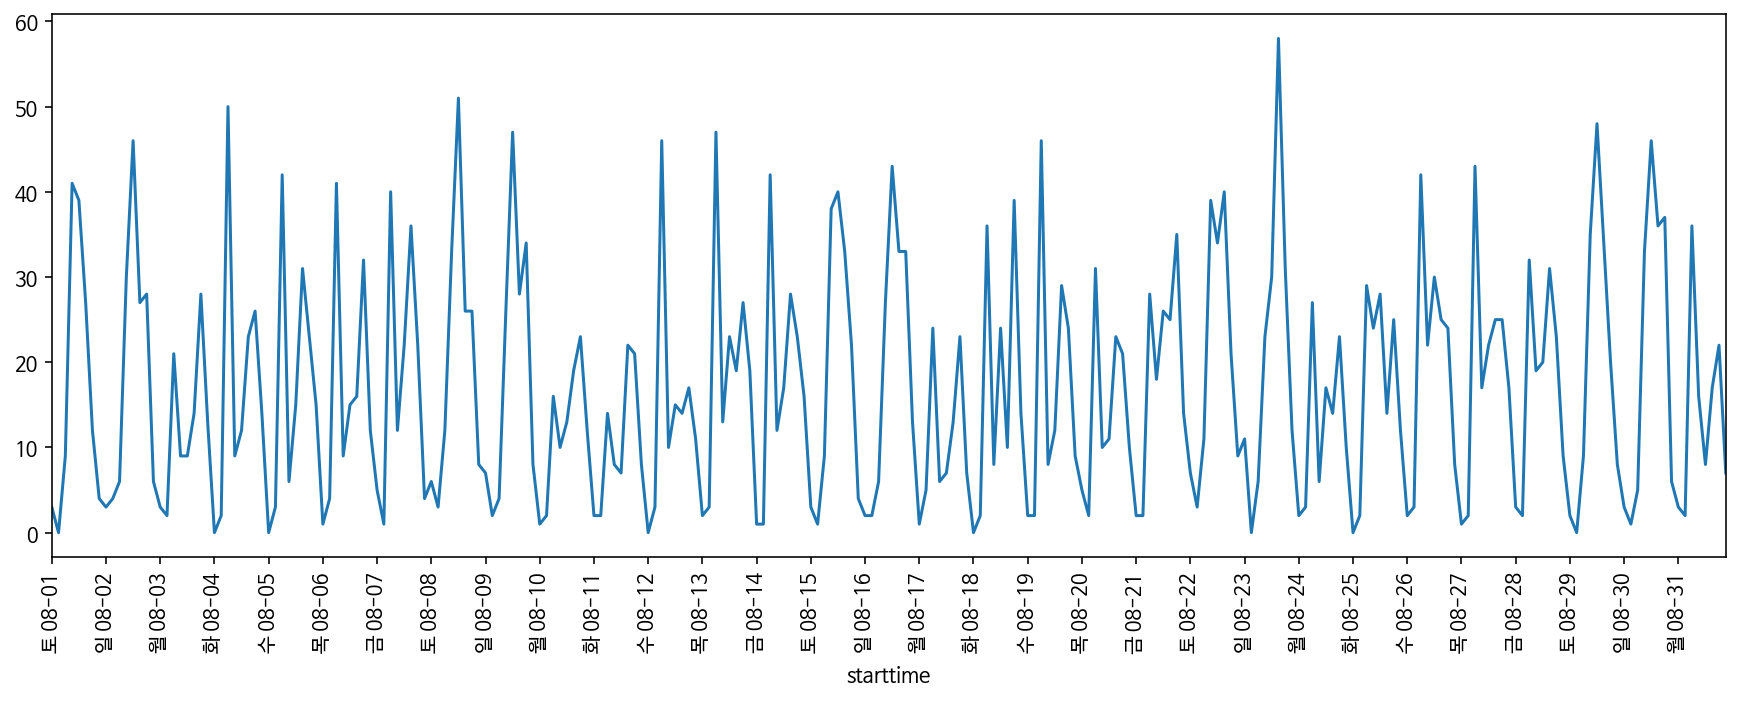

In [61]:
# 8월 한 달 동안의 대여 횟수
import pandas as pd

xticks = pd.date_range(citibike.index.min(), citibike.index.max())
week = ['일', '월', '화', '수', '목', ' 금', '토']
xticks_name = [ week[int(w)]+d for w,d in 
                    zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))]

plt.figure( figsize=(15, 5) )
citibike.plot()
plt.xticks(xticks, xticks_name, rotation=90)
plt.show()

- 낮과 밤, 주중과 주말의 패턴 차이


#### 훈련 세트와 테스트 세트로 나누기

- 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식
- 어떤 날짜를 기준으로 훈련 세트와 테스트 세트를 나눔

In [62]:
# 3시간 누적 카운트 이므로 하루 24/3=8 개씩 23일 치는 184개 8일 치는 64개
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듬
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눔
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test))) 
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="train predict")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="test predict")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("date")
    plt.ylabel("rental number")

#### 첫 번째 시도는 날짜와 시간을 하나의 숫자로 표현한 특성을 사용

In [65]:
# 타깃값 추출 (대여 횟수)
y = citibike.values

# POSIX 시간 : 1970/1/1 00:00:00 부터 초로 나타냄
# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype('int64'). values.reshape(-1,1)  // 10**9
X.shape

(248, 1)

RandomForestRegressro 이용

- 데이터 전처리가 거의 필요하지 않아 처음 시도해보기 좋은 모델

테스트 세트 R^2: -0.04


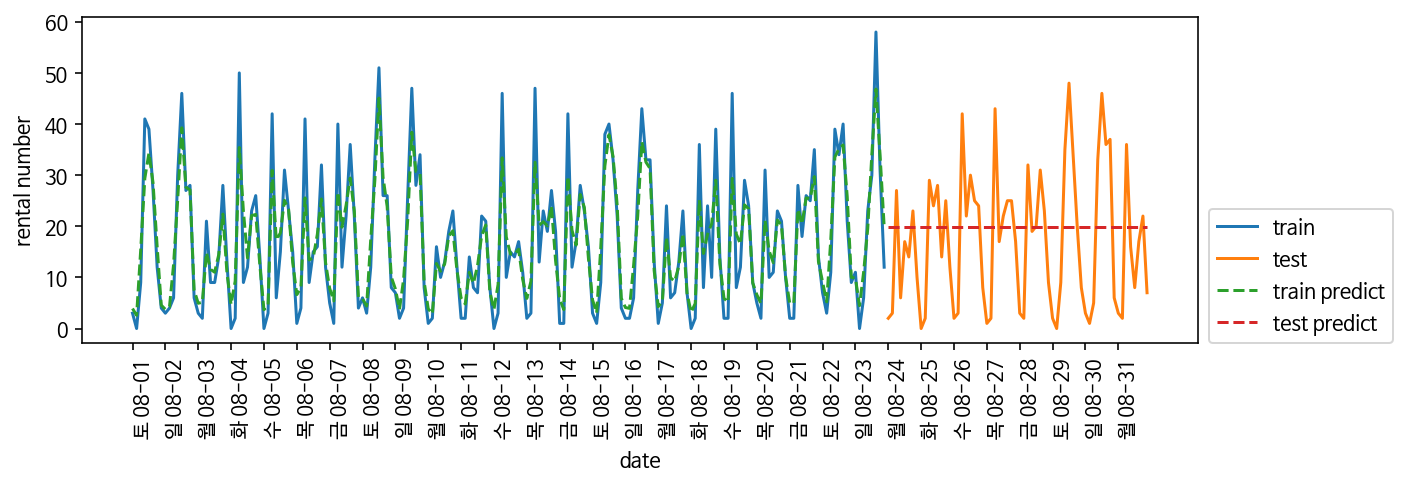

In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
eval_on_features(X, y, model)

- 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외샵(extrapolation)할 수 있는 능력이 없음
- 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용

#### 두 번째 시도는 시간과 요일 특성을 추가

- 전문가적 지식 : 훈련 데이터의 대여 데이터를 시간과 요일 이라는 두 요소가 중요한 것으로 보임

테스트 세트 R^2: 0.60


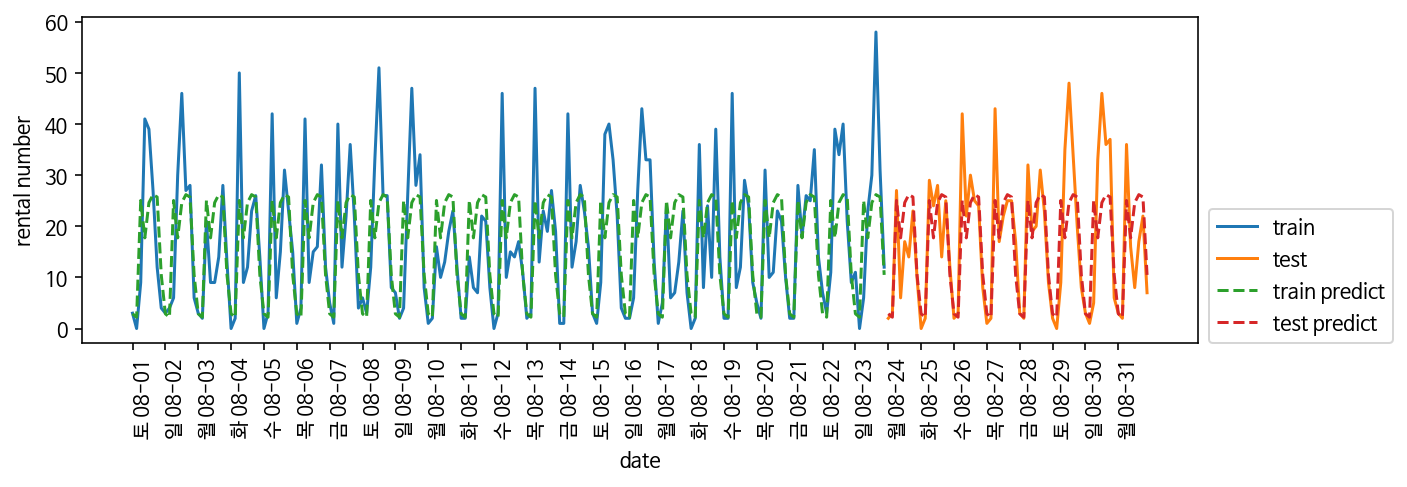

In [78]:
# 시간 정보 추가
X_hour = citibike.index.hour.values.reshape(-1,1)
X_hour.shape
eval_on_features(X_hour, y, model)

테스트 세트 R^2: 0.02


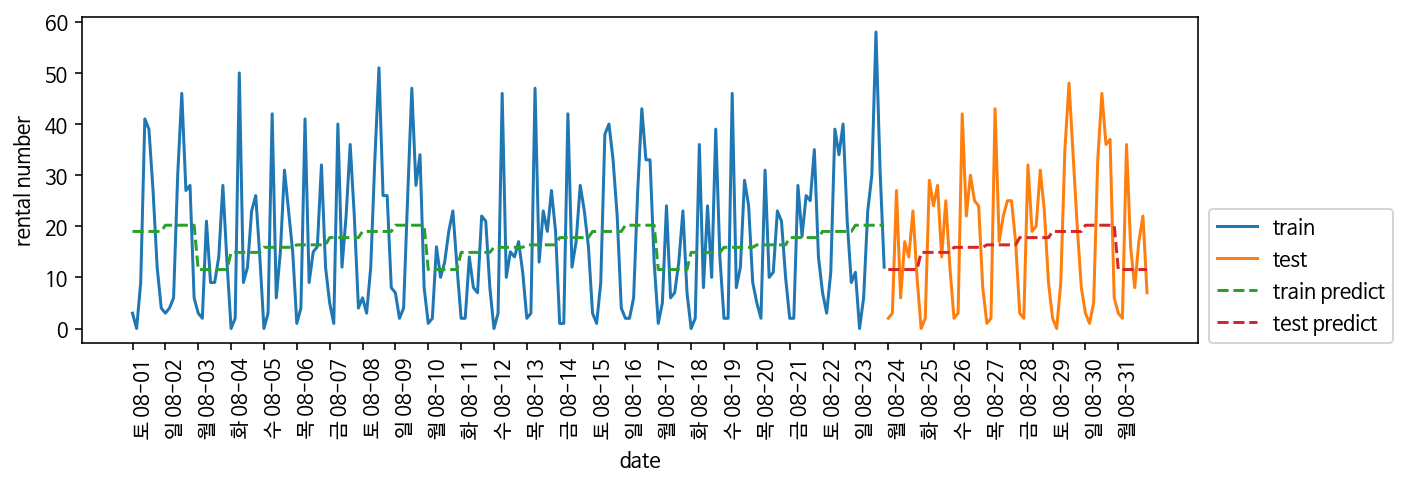

In [79]:
# 요일 정보만
X_week = citibike.index.dayofweek.values.reshape(-1, 1)
eval_on_features(X_week, y, model)

테스트 세트 R^2: 0.84


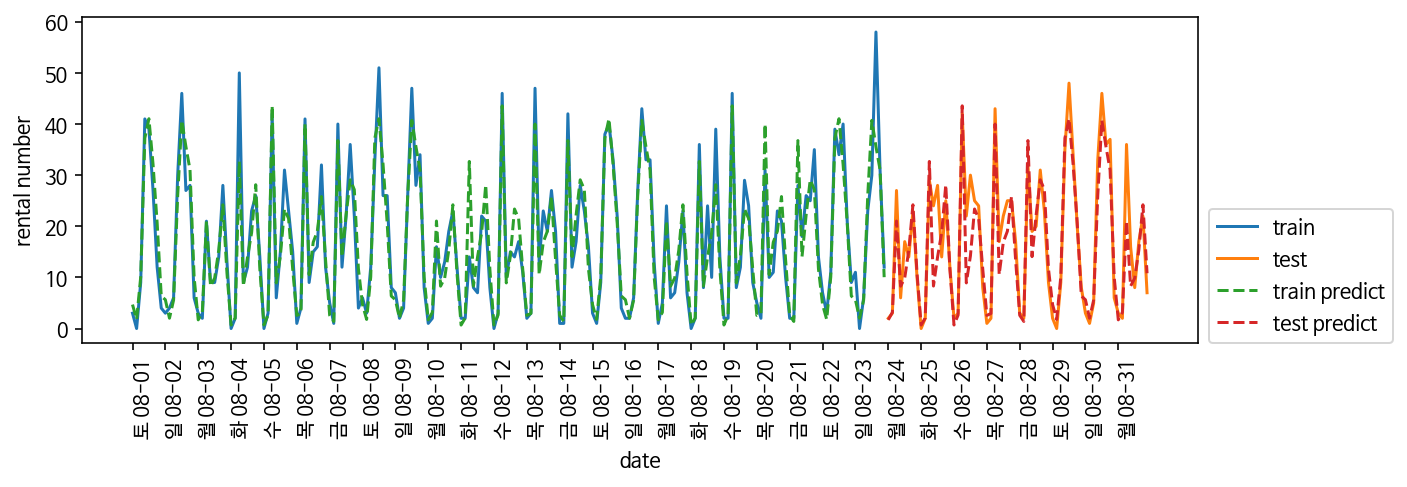

In [81]:
# 시간에 요일 정보도 추가
X_hour_week = np.hstack( [X_hour, X_week] )
eval_on_features(X_hour_week, y, model) 

테스트 세트 R^2: 0.13


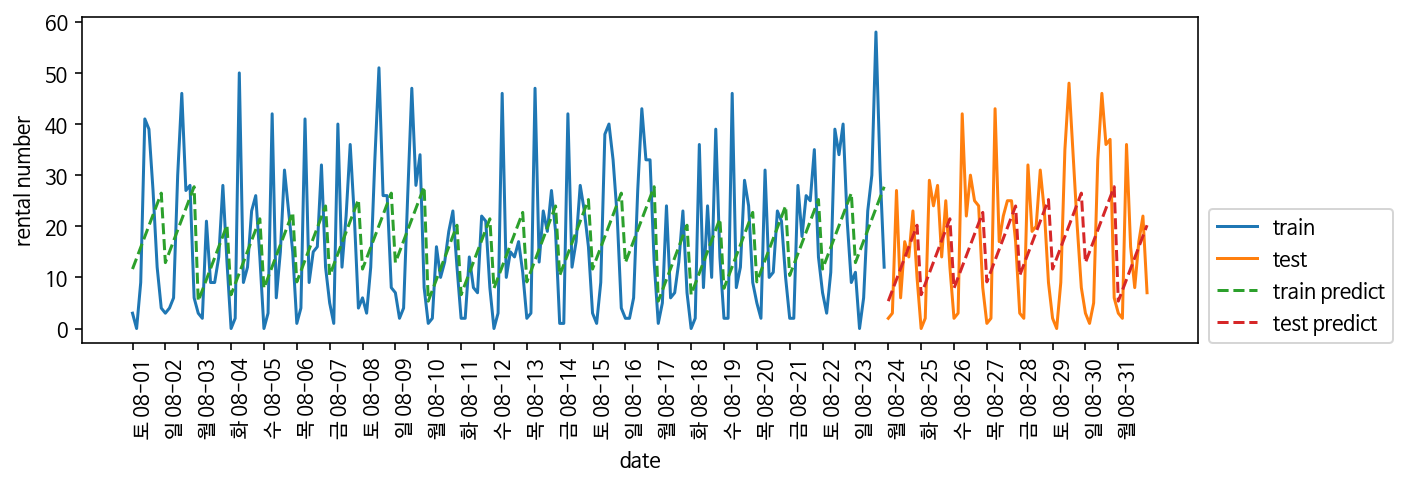

In [82]:
# LinearRegression 을 적용
# 굳이 랜덤 포레스트같이 복잡한 모델이 필요하지 않음
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

- 성능 나쁘고 주기 패턴 이상 이유
 - 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문
 - 하루에서 시간이 흐를 수록 대여수가 늘어나게 학습되어 있음
 - 하지만 실제 패턴 이보다 복잡 

- 이 패턴을 잡아내기 위해 OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_hour_week_oh = encoder.fit_transform(X_hour_week).toarray()
X_hour_week_oh.shape

(248, 15)

테스트 세트 R^2: 0.62


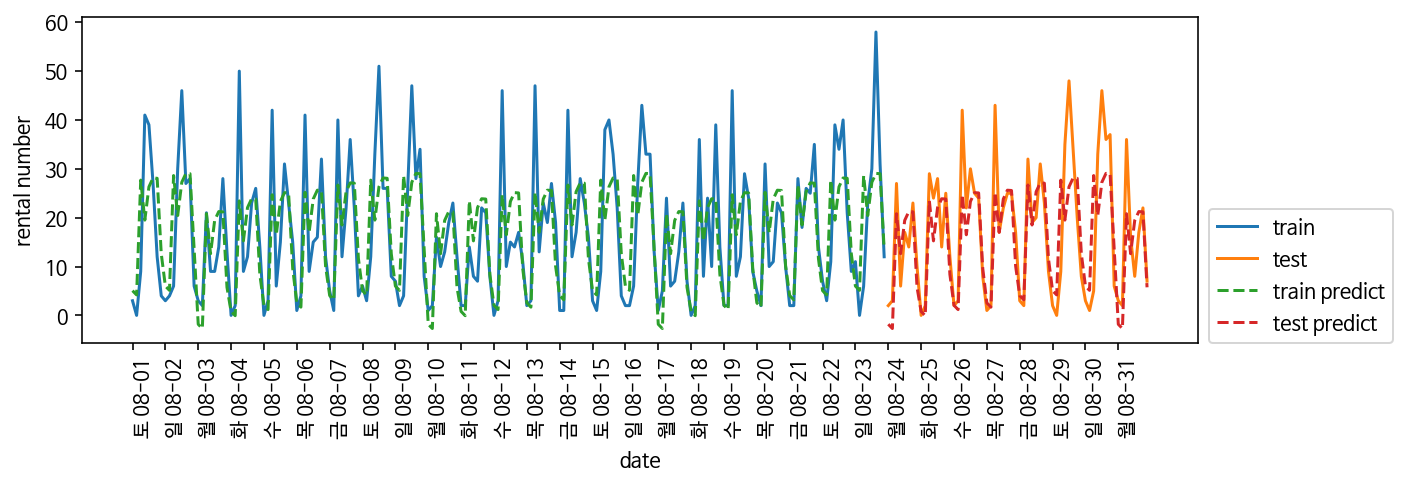

In [84]:
eval_on_features(X_hour_week_oh, y, LinearRegression())

Ridge 이용

테스트 세트 R^2: 0.62


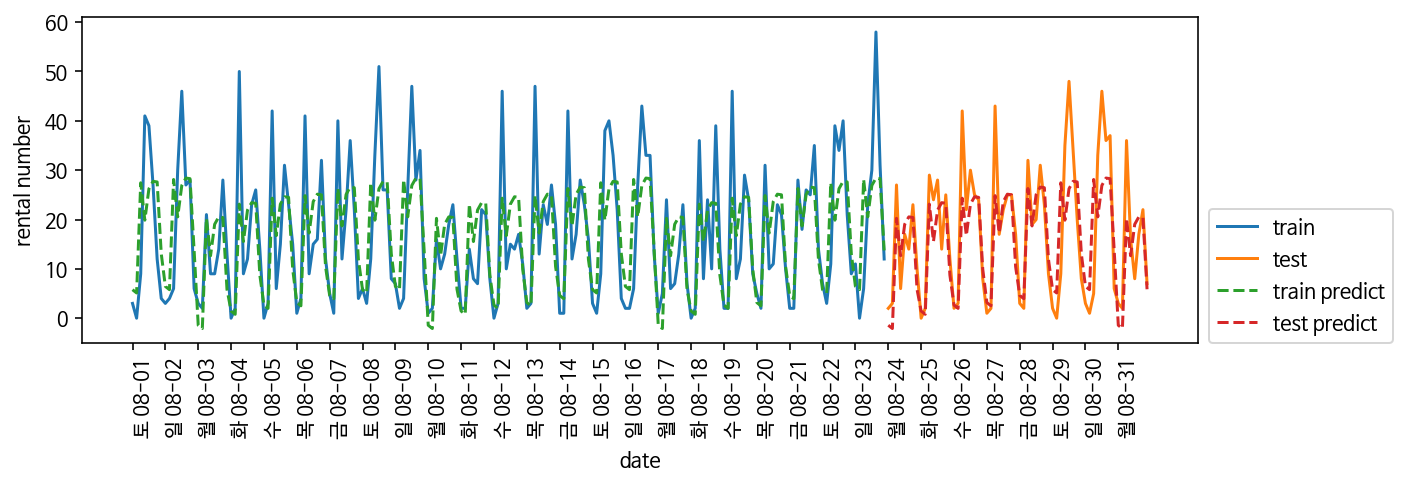

In [85]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_oh, y, Ridge())

- 연속형 특성일 때보다 훨씬 좋아짐

 - 이 선형 모델은 요일에 대해 하나의 계수를 학습
 - 시간에 대해서도 하나의 계수 학습
 - 시간 패턴이 모든 날에 걸쳐 공유된다는 뜻

- 상호작용 특성을 사용하면 시간과 요일 조합별 계수를 학습 가능

In [87]:
# 상호작용 특성 추가
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_oh_poly = poly.fit_transform(X_hour_week_oh)
X_hour_week_oh_poly.shape

(248, 120)

테스트 세트 R^2: 0.85


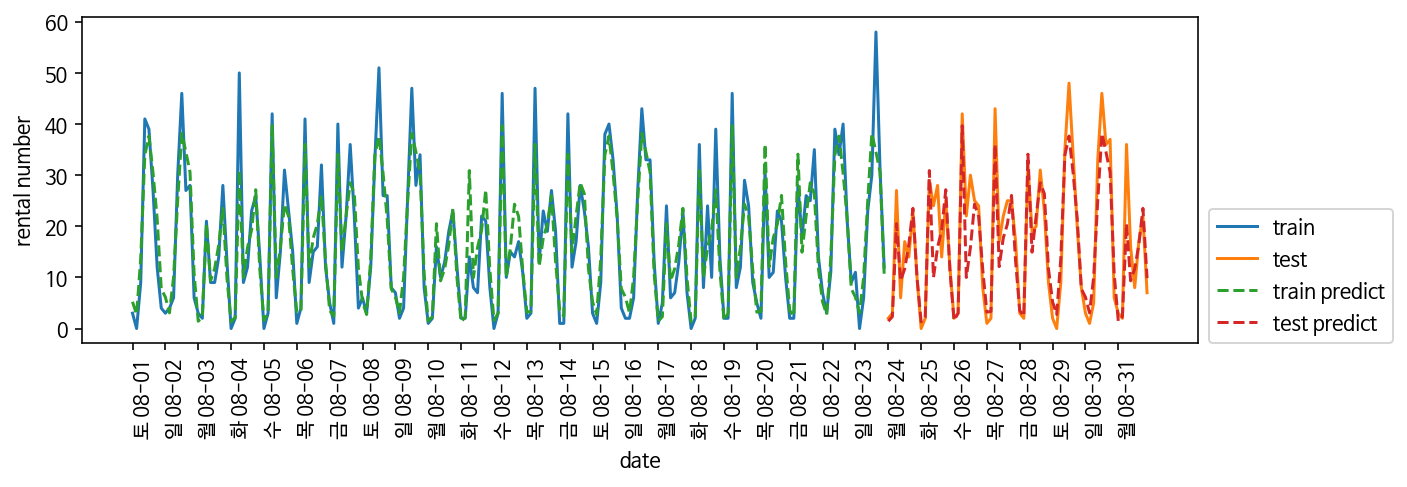

In [89]:
eval_on_features(X_hour_week_oh_poly, y, Ridge())

- 이 모델 가장 큰 장점 : 무엇이 학습되었는지 명확 

- 각 날짜와 시간에 대해 하나의 계수를 학습 

- 랜덤 포레스트와는 달리 이 모델이 학습한 계수를 그래프로 나타낼수 있음

In [ ]:
# 시간과 요일 특성의 이름


In [ ]:
# 추출한 모든 상호작용 특성에 이름을 부여
# 계수가 0이 아닌 특성만 선택


In [ ]:
# 시간과 요일의 곱을 사용한 선형 모델의 계수

## 특성 공학 실습 02

캐글 주택 가격

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- 문제 : 주택 판매 가격 예측 


### 데이터 사전 처리(Preprocessing)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv(drive_path + 'house_price.csv')


### 선형 회귀 모델의 학습/예측/평가

In [ ]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [ ]:
from sklearn.model_selection import cross_val_score

# 분할하지 않고 전체 데이터로 cross_val_score( ) 수행
# 모델별 CV RMSE값과 평균 RMSE 출력
def get_avg_rmse_cv(models):
    pass


In [ ]:
# lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력


* 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV



In [ ]:
# 최적화 alpha값으로 학습, 예측 및 평가 수행. 


* 데이터 왜곡 로그 변환 후 성능 평가

* 이상치 제거

### 회귀 트리 학습/예측/평가 

In [ ]:
from xgboost import XGBRegressor


In [ ]:
from lightgbm import LGBMRegressor


### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

## 특성 공학 실습 02

캐글 주택 가격

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- 문제 : 주택 판매 가격 예측 


### 데이터 사전 처리(Preprocessing)

In [100]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(drive_path + 'house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# 결측치 확인
# df.info()
df.shape
df.dtypes.value_counts()
isnull_df = df.isnull().sum()
isnull_df[ isnull_df > 0 ].sort_values(ascending=False)

In [ ]:
# y 분포확인
plt.title('Original Sale Price Histogram')
sns.distplot(df['SalePrice'])

In [ ]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(df['SalePrice'])
sns.distplot(log_SalePrice)

In [ ]:
# SalePrice 로그 변환
original_SalePrice = df['SalePrice']
df['SalePrice'] = np.log1p( df['SalePrice'] )

In [ ]:
# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
# PoolQC          1453
# MiscFeature     1406
# Alley           1369
# Fence           1179
# FireplaceQu      690
df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'],
        axis=1, inplace=True)

In [ ]:
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
df.fillna(df.mean(), inplace=True)

In [ ]:
sns.distplot(df['GrLivArea'])
df['GrLivArea'].hist()

In [ ]:
# Null 값이 있는 피처명과 타입을 추출
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df.dtypes[null_column_count.index])

In [ ]:
df.isnull().sum()[ df.isnull().sum() > 0 ].sort_values(ascending=False)

In [ ]:
# 원-핫 인코딩
print('get_dummies() 수행 전 데이터 Shape:', df.shape)
df_ohe = pd.get_dummies(df)
print('get_dummies() 수행 후 데이터 Shape:', df_ohe.shape)

null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df_ohe.dtypes[null_column_count.index])


### (Test) 특성 선택을 이용한 모델의 학습/예측/평가

In [92]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
  grid_search = GridSearchCV(model, param_grid=params, 
                             scoring='neg_mean_squared_error', cv=5)
  grid_search.fit(X, y)
  rmse = np.sqrt( -1 * grid_search.best_score_ )
  print(f'{model.__class__.__name__} CV RMSE AVG: {rmse:.3f},',
        f' Params: {grid_search.best_params_}')
  return grid_search.best_estimator_

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

X = df_ohe.drop('SalePrice',axis=1, inplace=False)
y = df_ohe['SalePrice']

select = RFE(RandomForestRegressor(random_state=42), 
              n_features_to_select=30)

X = select.fit_transform(X, y)

# 선택된 특성을 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])
plt.title("RFE")
plt.show()

NameError: ignored

In [91]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(Ridge(), ridge_params)
best_lasso = print_best_params(Lasso(), lasso_params)

NameError: ignored

### 선형 회귀 모델의 학습/예측/평가

In [ ]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y_target = df_ohe['SalePrice']
X_features = df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2,
                                                    random_state=42)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
tree_reg = RandomForestRegressor(random_state=0).fit(X_train, y_train)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, tree_reg]
get_rmses(models)


In [ ]:
from sklearn.model_selection import cross_val_score

# 분할하지 않고 전체 데이터로 cross_val_score( ) 수행
# 모델별 CV RMSE값과 평균 RMSE 출력
def get_avg_rmse_cv(models):
    pass


In [ ]:
# lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
for model in models:
  # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
  mse_list = -cross_val_score(model, 
                              X_features, y_target, 
                              scoring="neg_mean_squared_error", cv = 5)
  rmse_list = np.sqrt(mse_list)
  rmse_avg = np.mean(rmse_list)
  print(f'{model.__class__.__name__} CV RMSE 값 리스트: {np.round(rmse_list, 3)}')
  print(f'{model.__class__.__name__} CV 평균 RMSE 값: {rmse_avg:.3f}')
  print()

* 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 CV 시 최적 평균 RMSE 값:',
          f'{rmse:.4f}, 최적 alpha:{grid_model.best_params_}')
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)


In [ ]:
# 최적화 alpha값으로 학습, 예측 및 평가 수행. 
lr_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge(alpha=12).fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001).fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

* 데이터 왜곡 로그 변환 후 성능 평가

In [ ]:
from scipy.stats import skew  # 대칭성 정도 확인

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = df.dtypes[df.dtypes != 'object'].index

# df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = df[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

df['GrLivArea'].hist()

In [ ]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [ ]:
df['GrLivArea'].hist()

In [ ]:
# Skew가 높은 피처들을 로그 변환 했으므로
# 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2,
                                                    random_state=0)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge(alpha=10).fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001).fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

* 이상치 제거

In [ ]:
df_org = pd.read_csv(drive_path + 'house_price.csv')
plt.scatter(x = df_org['GrLivArea'], y = df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [ ]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

In [ ]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2,
                                                    random_state=0)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression().fit(X_train, y_train)
ridge_reg = Ridge(alpha=8).fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001).fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

### 회귀 트리 학습/예측/평가 

In [ ]:
from xgboost import XGBRegressor
xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

In [ ]:
from lightgbm import LGBMRegressor
lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4,
                         reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8).fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001).fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.5 * ridge_pred + 0.5 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4,
                         reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)